In [3]:
# importing pyspark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [4]:
# starting spark session
spark = SparkSession.builder.appName('lab4').getOrCreate()
sparkContext=spark.sparkContext

In [5]:
path = 'gs://labassignment4/studentData.csv'

In [6]:
schema = StructType([
    StructField("unt", FloatType(), nullable=True),
    StructField("id", FloatType(), nullable=True),
    StructField("major", StringType(), nullable=True),
    StructField("gender", StringType(), nullable=True),
    StructField("c01", FloatType(), nullable=True),
    StructField("c02", FloatType(), nullable=True),
    StructField("c03", FloatType(), nullable=True),
    StructField("c04", FloatType(), nullable=True),
    StructField("c05", FloatType(), nullable=True),
    StructField("c06", FloatType(), nullable=True),
    StructField("c07", FloatType(), nullable=True),
    StructField("c08", FloatType(), nullable=True),
    StructField("c09", FloatType(), nullable=True),
    StructField("c10", FloatType(), nullable=True),
    StructField("academic", FloatType(), nullable=True),
    StructField("campus", FloatType(), nullable=True),
    StructField("internship", FloatType(), nullable=True),
    StructField("AtRisk_academic", FloatType(), nullable=True),
    StructField("AtRisk_campus", FloatType(), nullable=True),
    StructField("AtRisk_internship", FloatType(), nullable=True),
    StructField("At_Risk", FloatType(), nullable=True),
    StructField("graduate_program", FloatType(), nullable=True),
    StructField("government", FloatType(), nullable=True),
    StructField("industry", FloatType(), nullable=True),
    StructField("placement", FloatType(), nullable=True),
    StructField("annual", FloatType(), nullable=True)]
)

In [7]:
# loading the dataset
df = spark.read.csv(path = path, schema = schema)

In [8]:
df.show(5)

22/10/29 23:12:10 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+----+--------------------+------+--------+---------+--------+----+---------+--------+--------+--------+---------+---------+---------+------+----------+---------------+-------------+-----------------+-------+----------------+----------+----------+----------+----------+
| unt|  id|               major|gender|     c01|      c02|     c03| c04|      c05|     c06|     c07|     c08|      c09|      c10| academic|campus|internship|AtRisk_academic|AtRisk_campus|AtRisk_internship|At_Risk|graduate_program|government|  industry| placement|    annual|
+----+----+--------------------+------+--------+---------+--------+----+---------+--------+--------+--------+---------+---------+---------+------+----------+---------------+-------------+-----------------+-------+----------------+----------+----------+----------+----------+
|null|null|               major|gender|    null|     null|    null|null|     null|    null|    null|    null|     null|     null|     null|  null|      null|           null|  

In [9]:
# removing the unwanted column
df.columns

['unt',
 'id',
 'major',
 'gender',
 'c01',
 'c02',
 'c03',
 'c04',
 'c05',
 'c06',
 'c07',
 'c08',
 'c09',
 'c10',
 'academic',
 'campus',
 'internship',
 'AtRisk_academic',
 'AtRisk_campus',
 'AtRisk_internship',
 'At_Risk',
 'graduate_program',
 'government',
 'industry',
 'placement',
 'annual']

In [10]:
ls = ['unt']

In [11]:
df = df.select([column for column in df.columns if column not in ls])

In [12]:
df.columns

['id',
 'major',
 'gender',
 'c01',
 'c02',
 'c03',
 'c04',
 'c05',
 'c06',
 'c07',
 'c08',
 'c09',
 'c10',
 'academic',
 'campus',
 'internship',
 'AtRisk_academic',
 'AtRisk_campus',
 'AtRisk_internship',
 'At_Risk',
 'graduate_program',
 'government',
 'industry',
 'placement',
 'annual']

In [13]:
df.count()

10001

In [14]:
# removing the duplicate rows
df = df.where(df.major != 'major')

In [15]:
df.count()

10000

In [16]:
# checking for null values
dfp = df.toPandas()
dfp.isna().sum()

id                   0
major                0
gender               0
c01                  0
c02                  0
c03                  0
c04                  0
c05                  0
c06                  0
c07                  0
c08                  0
c09                  0
c10                  0
academic             0
campus               0
internship           0
AtRisk_academic      0
AtRisk_campus        0
AtRisk_internship    0
At_Risk              0
graduate_program     0
government           0
industry             0
placement            0
annual               0
dtype: int64

In [17]:
num_features = [t[0] for t in df.dtypes if t[1] == 'float']
df.select(num_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,10000,4999.5,2886.8956799071675,0.0,9999.0
c01,10000,80.89587878684998,6.669895408755054,60.0,100.0
c02,10000,84.53121374816895,5.5116742943953,69.36416,100.0
c03,10000,74.78215115547181,7.913002697817608,53.488373,100.0
c04,10000,71.2186,11.4563296386268,52.0,100.0
c05,10000,72.415523361969,10.785391578359764,50.541515,100.0
c06,10000,80.76672812156677,8.180762278100376,58.525345,100.0
c07,10000,82.78914474258423,6.948573636217766,61.842106,100.0
c08,10000,81.84909083633423,6.527561255045217,64.93507,100.0


23


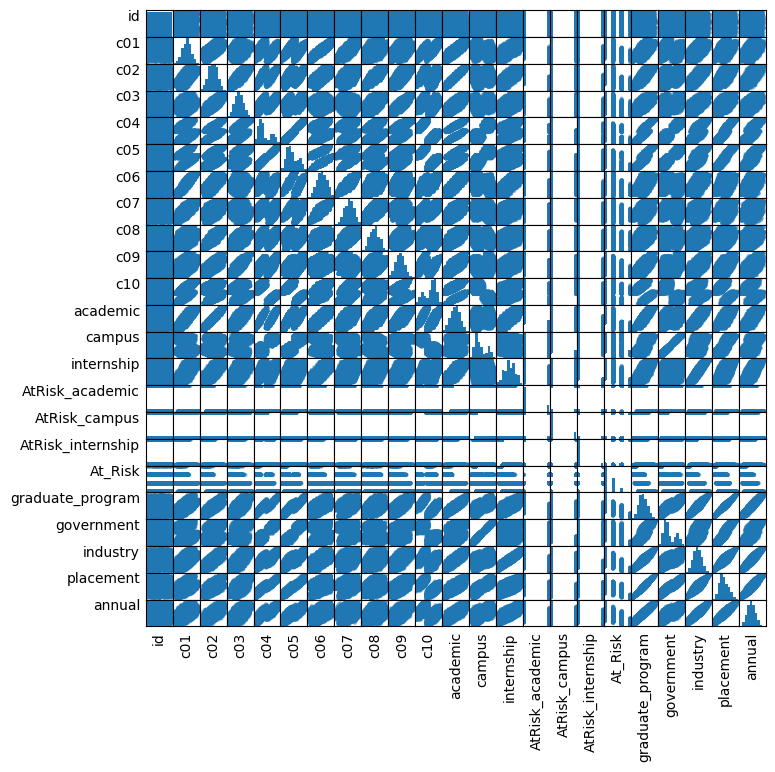

In [19]:
# checking correlations using plot
import pandas as pd

numeric_data = df.select(num_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
print(n)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [20]:
# looking at the columns with high correlation
print(df.stat.corr('placement','graduate_program'))
print(df.stat.corr('c01','c06'))
print(df.stat.corr('c04','c05'))
print(df.stat.corr('c02','academic'))
print(df.stat.corr('graduate_program','industry'))
print(df.stat.corr('campus','government'))

0.9708466407565267
0.8695848213239061
0.9509942087260601
0.9273336879997481
0.9071509901057896
0.9710722625824373


In [21]:
# selecting the label and feature columns
df = df.select('AtRisk_internship','c01','c02','c03','c04','c07','c08','c09','c10',
                                     'campus','internship','graduate_program','annual','major','gender')
cols = df.columns

In [22]:
# one hot encoding
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

stages = []
categoricalColumns = [
    'major','gender'
]

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(
        inputCols=[stringIndexer.getOutputCol()], 
        outputCols=[categoricalCol + "classVec"]
    )
    stages += [stringIndexer, encoder]
    

In [23]:
numericCols = ['c01','c02','c03','c04','c07','c08','c09','c10',
                                     'campus','internship','graduate_program','annual' ]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [25]:
# ML pipeline
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['features'] + cols
df = df.select(selectedCols)
df.printSchema()

IllegalArgumentException: Output column features already exists.

In [26]:
# splitting the data as train and test sets
final_data = df.select('features','AtRisk_internship')
train_data,test_data=final_data.randomSplit([0.75,0.25])
train_data.describe().show()

+-------+-------------------+
|summary|  AtRisk_internship|
+-------+-------------------+
|  count|               7579|
|   mean|0.10172846021902626|
| stddev|0.30231083202921716|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [27]:
train_data.columns

['features', 'AtRisk_internship']

In [28]:
# importing the ml libraries
from pyspark.ml.classification import LogisticRegression

In [29]:
# building the model
lr = LogisticRegression(featuresCol = 'features', labelCol  = 'AtRisk_internship', maxIter=1)
model = lr.fit(train_data)

22/10/29 23:21:18 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/10/29 23:21:19 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [30]:
# getting the predictions
pred_train = model.transform(train_data)
pred = model.transform(test_data)
pred.select("prediction","AtRisk_internship")

DataFrame[prediction: double, AtRisk_internship: float]

In [32]:
# evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evalu = BinaryClassificationEvaluator(rawPredictionCol = "rawPrediction", labelCol = "AtRisk_internship")

print("the area under ROC for the train set is {}".format(evalu.evaluate(pred_train)))
print("the area under ROC for the test set is {}".format(evalu.evaluate(pred)))

the area under ROC for the train set is 0.9359148312582589


the area under ROC for the test set is 0.9483846849353157


In [33]:
# hyperparameter tuning and vross validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,5,10])\
    .addGrid(lr.elasticNetParam,[0.0, 0.5, 1.0])\
    .addGrid(lr.fitIntercept,[False, True])\
    .addGrid(lr.maxIter,[1,10])\
    .addGrid(lr.regParam,[0.01, 0.5, 2.0]) \
    .build()

In [ ]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=eval, numFolds=3)

# Run cross validations
cvModel = cv.fit(train_data)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing


22/10/29 23:23:41 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/10/29 23:24:05 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed
22/10/29 23:24:29 ERROR breeze.optimize.LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search failed


In [ ]:
predict_train=cvModel.transform(train_data)
predict_test=cvModel.transform(test_data)
print("The area under ROC for train set after CV  is {}".format(eval.evaluate(predict_train)))
print("The area under ROC for train set after CV  is {}".format(eval.evaluate(predict_test)))